<a href="https://colab.research.google.com/github/Saigirish-Suryadevara/Saigirish_INFO5731_Fall2024/blob/main/Saigirish_Suryadevara_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
!! pip install bertopic

['Collecting bertopic',
 '  Downloading bertopic-0.16.4-py3-none-any.whl.metadata (23 kB)',
 'Collecting hdbscan>=0.8.29 (from bertopic)',
 '  Downloading hdbscan-0.8.40-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)',
 'Requirement already satisfied: numpy>=1.20.0 in /usr/local/lib/python3.10/dist-packages (from bertopic) (1.26.4)',
 'Requirement already satisfied: pandas>=1.1.5 in /usr/local/lib/python3.10/dist-packages (from bertopic) (2.2.2)',
 'Requirement already satisfied: plotly>=4.7.0 in /usr/local/lib/python3.10/dist-packages (from bertopic) (5.24.1)',
 'Requirement already satisfied: scikit-learn>=0.22.2.post1 in /usr/local/lib/python3.10/dist-packages (from bertopic) (1.5.2)',
 'Requirement already satisfied: sentence-transformers>=0.4.1 in /usr/local/lib/python3.10/dist-packages (from bertopic) (3.2.1)',
 'Requirement already satisfied: tqdm>=4.41.1 in /usr/local/lib/python3.10/dist-packages (from bertopic) (4.66.6)',
 'Collecting umap-learn>=0

In [ ]:
# Write your code here
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
import pandas as pd
from bertopic import BERTopic

# loading dataset
path_file = '/content/Movie_Review_Sentiment.csv'
dataset = pd.read_csv(path_file)
text = dataset['clean_text']

#vectorisation function
def text_vectorize(text, method="count", feature_max = 1500):
  if method == "count":
    vectorize = CountVectorizer(max_df=0.95, min_df=2, max_features= feature_max, stop_words='english')

  else:
    vectorize = TfidfVectorizer(max_df=0.95, min_df=2, max_features= feature_max, stop_words='english')

  return vectorize, vectorize.fit_transform(text)


# LDA modeling
def lda_topic(data_vectorized, vectorizer, num_topics = 10):
  model_lda = LatentDirichletAllocation(n_components= num_topics, random_state= 42)
  model_lda.fit(data_vectorized)
  name_feature = vectorizer.get_feature_names_out()
  topics = []
  for indx_topic, topic in enumerate(model_lda.components_):
    topics.append([name_feature[i] for i in topic.argsort()[:-11:-1]])
  return topics

# LSA modeling
def lsa_topic(data_vectorized, vectorizer, num_topics=10):
  model_lsa = TruncatedSVD(n_components=num_topics, random_state=42)
  model_lsa.fit(data_vectorized)
  name_feature = vectorizer.get_feature_names_out()
  topics=[]
  for indx_topic, topic in enumerate(model_lsa.components_):
    topics.append([name_feature[i] for i in topic.argsort()[:-11:-1]])
  return topics

#Bertopic model
def bert_topic(text, num_topics=10):
  model_bert = BERTopic(nr_topics=num_topics, verbose= True)
  topics, probs = model_bert.fit_transform(text)
  info_topic = model_bert.get_topic_info()
  return model_bert, info_topic


# applying vectoization
vectorize_count, data_count = text_vectorize(text, method="count")
vectorize_tfidf, data_tfidf = text_vectorize(text, method="tfidf")

# running lsa & lda models
topics_lda = lda_topic(data_count, vectorize_count)
topics_lsa = lsa_topic(data_tfidf, vectorize_tfidf)

# summarising topics
summary_lda = {f"Topic {i+1}": topics_lda[i] for i in range(len(topics_lda))}
summary_lsa = {f"Topic {i+1}": topics_lsa[i] for i in range(len(topics_lsa))}

# Running Bertopic model
model_bert, topics_bert = bert_topic(text)

# printing results
print("LDA topics:")
for t, w in summary_lda.items():
  print(f"{t}: {', '.join(w)}")

print("\n LSA topics:")
for t, w in summary_lsa.items():
  print(f"{t}: {', '.join(w)}")

print("\n BERTopic topics:")
print(topics_bert)




2024-11-19 04:29:10,359 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/41 [00:00<?, ?it/s]

2024-11-19 04:31:56,965 - BERTopic - Embedding - Completed ✓
2024-11-19 04:31:56,968 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-19 04:32:14,468 - BERTopic - Dimensionality - Completed ✓
2024-11-19 04:32:14,471 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-19 04:32:14,574 - BERTopic - Cluster - Completed ✓
2024-11-19 04:32:14,576 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-19 04:32:15,020 - BERTopic - Representation - Completed ✓
2024-11-19 04:32:15,022 - BERTopic - Topic reduction - Reducing number of topics
2024-11-19 04:32:15,492 - BERTopic - Topic reduction - Reduced number of topics from 54 to 10


LDA topics:
Topic 1: movie, ishaan, wick, film, aamir, john, action, like, khan, just
Topic 2: film, pacino, dormer, williams, insomnia, good, character, al, nolan, robin
Topic 3: movie, film, like, just, story, time, really, good, best, great
Topic 4: film, movie, godfather, best, films, time, story, just, don, corleone
Topic 5: movie, film, child, just, khan, aamir, like, children, character, zameen
Topic 6: nolan, movie, interstellar, best, film, just, chihiro, space, cooper, movies
Topic 7: film, tarantino, django, characters, chihiro, world, away, story, spirited, great
Topic 8: film, family, movie, michael, don, like, corleone, vito, pacino, godfather
Topic 9: film, movie, story, away, wallace, like, spirited, characters, films, just
Topic 10: movie, film, just, people, watch, like, saw, way, seen, 10

 LSA topics:
Topic 1: film, movie, just, like, story, best, great, time, good, films
Topic 2: pacino, williams, insomnia, nolan, dormer, robin, al, swank, cop, character
Topic 3: m

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

Logistic Regression cross-validation F1 scores: [0.72987013 0.68276599 0.66864407 0.70980871 0.68276599]
Logistic Regression Mean F1 score: 0.6947709763309234
Random Forest cross-validation F1 scores: [0.88273432 0.86438784 0.90023357 0.89154192 0.79824561]
Random Forest Mean F1 score: 0.8674286509456429

 Logistic regression report:
              precision    recall  f1-score   support

    NEGATIVE       1.00      0.37      0.54        59
    POSITIVE       0.84      1.00      0.92       201

    accuracy                           0.86       260
   macro avg       0.92      0.69      0.73       260
weighted avg       0.88      0.86      0.83       260


 Random Forest report:
              precision    recall  f1-score   support

    NEGATIVE       0.98      0.69      0.81        59
    POSITIVE       0.92      1.00      0.95       201

    accuracy                           0.93       260
   macro avg       0.95      0.84      0.88       260
weighted avg       0.93      0.93      0.

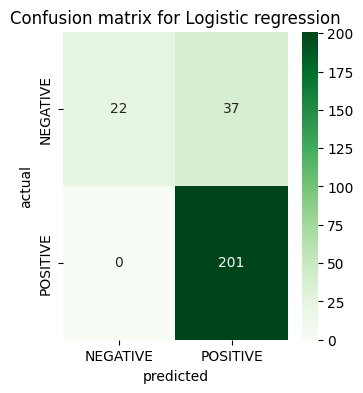

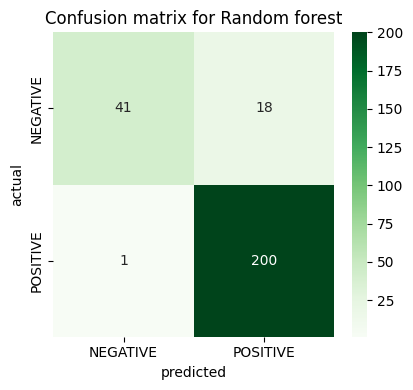

In [ ]:
# Write your code here
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
path_file = '/content/Movie_Review_Sentiment.csv'
dataset = pd.read_csv(path_file)
text = dataset['clean_text']
sentiment = dataset['sentiment']

# I have used TF-IDF representation features for sentiment classification of text data.
# I chose Tf-Idf because it captures both importance and frequency of terms in a document
# throughout complete corpus. This enables us to find key terms that are more relevant with sentiment while
# oppressing stopwords. A max of 6000 features are selected to balance efficieny & conserving meaningful context

# splitting data into testing & training datasets
text_train, text_test, sentiment_train, sentiment_test = train_test_split(text, sentiment, test_size = 0.2, random_state=42, stratify= sentiment)

# converting text into features using TF-IDF
vectorize = TfidfVectorizer(max_features=6000, stop_words='english')
text_train_tfidf = vectorize.fit_transform(text_train)
text_test_tfidf = vectorize.transform(text_test)

# defining models
LR_model = LogisticRegression(random_state=42, max_iter=1000)
RF_model = RandomForestClassifier(random_state=42, n_estimators=100)

#crossvalidation for LR_model

LR_model_cv_score = cross_val_score(LR_model, text_train_tfidf, sentiment_train, cv=5, scoring='f1_macro')
print(f"Logistic Regression cross-validation F1 scores: {LR_model_cv_score}")
print(f"Logistic Regression Mean F1 score: {LR_model_cv_score.mean()}")

# train LR_model

LR_model.fit(text_train_tfidf, sentiment_train)
sentiment_pred_LR_model = LR_model.predict(text_test_tfidf)

#crossvalidation for LR_model

RF_model_cv_score = cross_val_score(RF_model, text_train_tfidf, sentiment_train, cv=5, scoring='f1_macro')
print(f"Random Forest cross-validation F1 scores: {RF_model_cv_score}")
print(f"Random Forest Mean F1 score: {RF_model_cv_score.mean()}")

# train RF_model

RF_model.fit(text_train_tfidf, sentiment_train)
sentiment_pred_RF_model = RF_model.predict(text_test_tfidf)

# evaluating both models on test set
print("\n Logistic regression report:")
print(classification_report(sentiment_test,sentiment_pred_LR_model))

print("\n Random Forest report:")
print(classification_report(sentiment_test,sentiment_pred_RF_model))

# Confusion matrix
LR_model_matrix = confusion_matrix(sentiment_test,sentiment_pred_LR_model)
RF_model_matrix = confusion_matrix(sentiment_test,sentiment_pred_RF_model)

# matrix visual for Logistic regression
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.heatmap(LR_model_matrix, annot=True, fmt= 'g', cmap='Greens', xticklabels=LR_model.classes_, yticklabels=LR_model.classes_)
plt.title("Confusion matrix for Logistic regression")
plt.xlabel("predicted")
plt.ylabel("actual")

# matrix visual for Random forest
plt.figure(figsize=(8,4))
plt.subplot(1,2,2)
sns.heatmap(RF_model_matrix, annot=True, fmt= 'g', cmap='Greens', xticklabels=RF_model.classes_, yticklabels=RF_model.classes_)
plt.title("Confusion matrix for Random forest")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.tight_layout()
plt.show()






# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

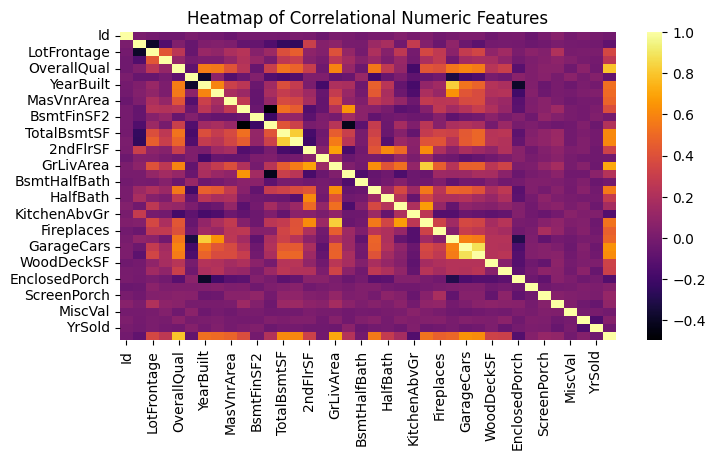

Top Correlational Feature:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

 Metrics of Model Evaluation:
Mean_Squared_Error:1573401881.37
Mean_Absolute_Error:25253.00
R-Squared:0.79


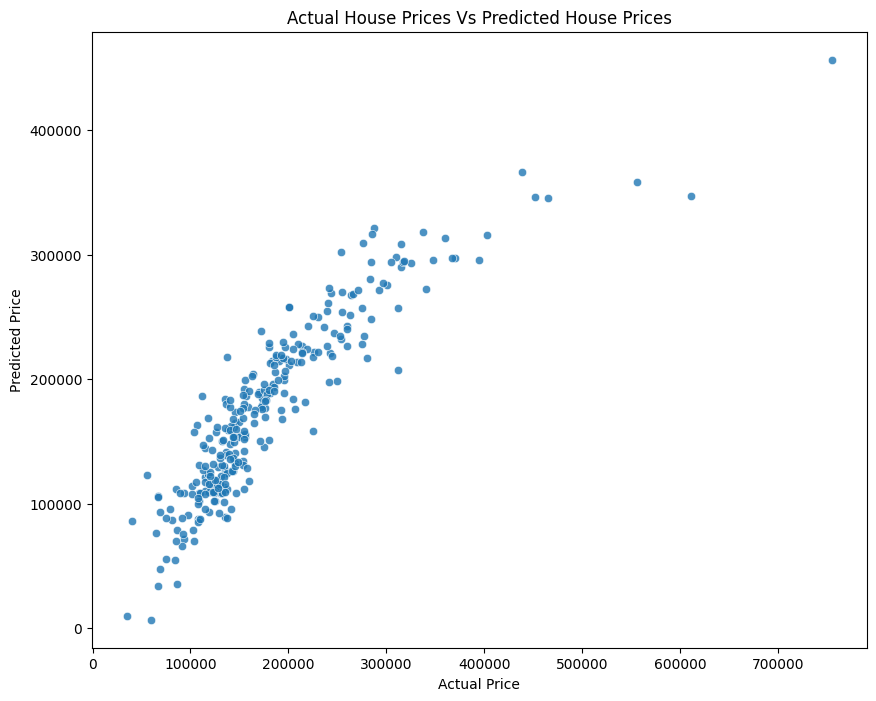

In [3]:
# Write your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
data_train = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')

# Exploratory Data Analysis (EDA)
print(data_train.info())
print(data_train.describe())
print(data_train.isnull().sum().sort_values(ascending=False))

# SalePrice Correlation
num_features = data_train.select_dtypes(include=['float64', 'int64'])
matrix_corr = num_features.corr()

plt.figure(figsize=(8,4))
sns.heatmap(matrix_corr, cmap="inferno", annot=False)
plt.title("Heatmap of Correlational Numeric Features")
plt.show()

corr = num_features.corr()['SalePrice'].sort_values(ascending=False)
print("Top Correlational Feature:\n", corr.head(10))

# Handling missing values
for colm in data_train.select_dtypes(include=['float64','int64']).columns:
  data_train[colm] = data_train[colm].fillna(data_train[colm].median())
for colm in data_train.select_dtypes(include=['float64','int64']).columns:
  data_train[colm] = data_train[colm].fillna(data_train[colm].mode()[0])

# Feature Selection based on correaltion with SalePrice
features_selected = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']

#These selected features are correlated strongly with SalePrice for predecting house prices
#'OverallQual' - Complete material quality
#'GrLivArea' - ground living area
#'GarageCars' - car number that can fit in garage
#'TotalBsmtSF' - Square foot size of basement
#'1stFlrSF' - Square foot size of 1st floor
#'YearBuilt' - Year in which house was built

# Dataset splitting
x = data_train[features_selected]
y = data_train['SalePrice']

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

# Data Preprocessing
scale = StandardScaler()
train_scaled_x = scale.fit_transform(train_x)
test_scaled_x = scale.transform(test_x)

# Linear regression model
LR_model = LinearRegression()
LR_model.fit(train_scaled_x, train_y)

pred_y = LR_model.predict(test_scaled_x)
mean_SE = mean_squared_error(test_y,pred_y)
mean_AE = mean_absolute_error(test_y,pred_y)
score_r2 = r2_score(test_y,pred_y)

print("\n Metrics of Model Evaluation:")
print(f"Mean_Squared_Error:{mean_SE:.2f}")
print(f"Mean_Absolute_Error:{mean_AE:.2f}")
print(f"R-Squared:{score_r2:.2f}")

plt.figure(figsize=(10,8))
sns.scatterplot(x=test_y, y=pred_y, alpha = 0.8)
plt.title("Actual House Prices Vs Predicted House Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()




# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


Explaination for selected PLM:
Overview:
Model name: facebook BART LARGE mnli
Model type: It is a PLM based on Transfromer
Released by: Facebook AI Research
BART LARGE mnli is a sequence to sequence transformer model, with both combined elements of GPT & BERT. It uses a denoising encoder structure, where it is trained to forecast or predict missing parts of a text.

Pre-trained datasources:
>English WiKipedia - 2.5B words

>BooksCorpus - 800M words

>OpenWebText - pages similar to Reddit content

>CC-News - news collected from Common Crawl

No. of Parameters: 406M parameters

Task specific Fine-Tuning:
> The model was fine-tuned on the MNLI (Multi-genre Natural Language Inference) data, which involve classifying relation between a premise and a hypotheis. This makes it very effective for zero-shot classification.


In [32]:
# Write your code here
import pandas as pd
from transformers import pipeline
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score

# loading & cleaning the dataset
dataset = pd.read_csv('/content/Movie_Review_Sentiment.csv')
dataset = dataset.dropna(subset=['clean_text','sentiment'])
dataset = dataset.sample(n=100, random_state=42) # limiting to 100 colums for faster processing

# converting labels to number format
mapping_label = {'POSITIVE':1, 'NEGATIVE':0}
dataset['label_sentiment'] = dataset['sentiment'].map(mapping_label)

# Intiating model for sentiment analysis
name_model = "facebook/bart-large-mnli"
pipeline_sentiment = pipeline("zero-shot-classification", name_model)

labels_given = ["POSITIVE","NEGATIVE"]

# Using model to predict sentiments
prediction_sentiment = []
for t in dataset['clean_text']:
  r = pipeline_sentiment(t, labels_given)
  label_predicted = r['labels'][0]
  prediction_sentiment.append(label_predicted)

# converting labels predicted to number format
labels_predicted = [mapping_label[l] if l in mapping_label else 2 for l in prediction_sentiment]

# comparing predicted sentiment to actual annotated sentiment
actual_labels = dataset['label_sentiment']

# calculating precision,accuracy,recall,f1 score
acc = accuracy_score(actual_labels, labels_predicted)
prec = precision_score(actual_labels, labels_predicted, average='weighted')
rec = recall_score(actual_labels, labels_predicted, average='weighted')
f1_score = f1_score(actual_labels, labels_predicted, average='weighted')

print(f"Accuracy Score: {acc:.3f}")
print(f"Precision Score: {prec:.3f}")
print(f"Recall Score: {rec:.3f}")
print(f"F1 Score: {f1_score:.3f}")






Accuracy Score: 0.830
Precision Score: 0.827
Recall Score: 0.830
F1 Score: 0.829


Advantages:
>Zero-shot learning: Can classify data text to custom category without fine-tuning.

> Pre-trained on variety and large dataset, thus making it adaptable for variety of NLP tasks.

> Strong performance, works well for tasks like text classification & sentiment analysis.

Disadvantages:
> Requires predefined labels for limiting flexibility and classification

> Performance efficiency may vary on highly nuanced sentiment.

> Requires high significant computational power

Challenges:
> Generic outputs need to be mapped to sentiment categories.

> Long length texts need truncation, losing context.

> Can misclassify texts with mixed sentiments
